In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [5]:
df = pd.read_csv('./naver_ad1.csv', index_col=0)

In [6]:
df.head()

,광고그룹,키워드,노출수,클릭수,"총비용(VAT포함,원)"
0,디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,2512444
1,업무자동화_VBA,-,767491,8058.0,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,1568699
3,데이터 분석 입문 온라인_파콘,-,694106,1863.6,1175174
4,3. html,HTML,9626374,813.6,1145903


In [7]:
# 클릭률 = 클릭수/노출수
# 클릭당 지출 (CPC) = 

In [8]:
df['클릭률'] = df['클릭수']/df['노출수']
df.head()

,광고그룹,키워드,노출수,클릭수,"총비용(VAT포함,원)",클릭률
0,디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,2512444,0.004141
1,업무자동화_VBA,-,767491,8058.0,2384965,0.010499
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,1568699,0.000285
3,데이터 분석 입문 온라인_파콘,-,694106,1863.6,1175174,0.002685
4,3. html,HTML,9626374,813.6,1145903,0.000085


In [9]:
df['클릭당비용'] = df['총비용(VAT포함,원)']/df['클릭수']
df.head()

,광고그룹,키워드,노출수,클릭수,"총비용(VAT포함,원)",클릭률,클릭당비용
0,디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,2512444,0.004141,261.549448
1,업무자동화_VBA,-,767491,8058.0,2384965,0.010499,295.974808
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,1568699,0.000285,4841.663580
3,데이터 분석 입문 온라인_파콘,-,694106,1863.6,1175174,0.002685,630.593475
4,3. html,HTML,9626374,813.6,1145903,0.000085,1408.435349


In [10]:
# 클릭률이 높은 키워드

In [13]:
df.sort_values('클릭률', ascending=False)[:10]

,광고그룹,키워드,노출수,클릭수,"총비용(VAT포함,원)",클릭률,클릭당비용
32,디자인 툴_파워컨텐츠_포토샵,포토샵배우기,12700,1725.6,337117,0.135874,195.362193
14,업무자동화_VBA,엑셀배우기,18588,2097.6,562870,0.112847,268.340008
192,디자인 툴_파워컨텐츠_포토샵,포토샵강좌,2961,302.4,50369,0.102128,166.564153
100,업무자동화_VBA,엑셀학원,4873,452.4,125785,0.092838,278.039346
22,1. 코딩,코딩인강,2503,218.4,428670,0.087255,1962.774725
42,2. 프로그래밍,프로그래밍인강,1568,135.6,282480,0.086480,2083.185841
291,투자_파워콘텐츠,펀드하는법,3026,248.4,24552,0.082089,98.840580
277,디자인 툴_파워컨텐츠_포토샵,일러스트레이터강좌,1864,147.6,27379,0.079185,185.494580
59,페이스북&인스타그램 마케팅 실전,SNS마케팅교육,1215,78.0,206877,0.064198,2652.269231
115,투자_파워콘텐츠,재테크,4810,300.0,102894,0.062370,342.980000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 0 to 1380
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   광고그룹          1381 non-null   object 
 1   키워드           1381 non-null   object 
 2   노출수           1381 non-null   int64  
 3   클릭수           1381 non-null   float64
 4   총비용(VAT포함,원)  1381 non-null   int64  
 5   클릭률           1381 non-null   float64
 6   클릭당비용         1057 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 86.3+ KB


In [15]:
df.isnull().sum()

광고그룹              0
키워드               0
노출수               0
클릭수               0
총비용(VAT포함,원)      0
클릭률               0
클릭당비용           324
dtype: int64

In [16]:
df.fillna(0, inplace=True)
df.info() # 0으로 채워서 null값 없어짐

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 0 to 1380
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   광고그룹          1381 non-null   object 
 1   키워드           1381 non-null   object 
 2   노출수           1381 non-null   int64  
 3   클릭수           1381 non-null   float64
 4   총비용(VAT포함,원)  1381 non-null   int64  
 5   클릭률           1381 non-null   float64
 6   클릭당비용         1381 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 86.3+ KB


In [17]:
df['키워드'].unique()

array(['-', '일러스트', 'HTML', ..., 'MATCH', 'DECISION', 'REST'],
      dtype=object)

In [18]:
for k in df['키워드'].unique():
    print(k)

-
일러스트
HTML
파이썬
코딩
C언어
가상화폐
포토샵
마케팅교육
인스타팔로워늘리기
블록체인
엑셀
엑셀배우기
엑셀자격증
파이썬교육
인터넷쇼핑몰창업
영상편집
파이썬인강
어플개발
UIUX디자인
코딩인강
앱개발
어플제작
앱제작
컴퓨터활용능력
인스타팔로워
자바스크립트
포토샵배우기
게임학원
이더리움
머신러닝
영상제작
SNS마케팅교육
데이터사이언스
컴퓨터활용능력2급
파이썬강좌
구글광고
프로그래밍인강
컴퓨터활용능력1급
컴퓨터자격증종류
어플만들기
업무자동화
브랜딩
상세페이지제작
리눅스
포토샵강좌
코딩프로그램
프리미어프로
일러스트레이터
스프링
자료구조
브랜드네이밍
경매
온라인쇼핑몰창업
엑셀강의
온라인마케팅교육
파이썬강의
폰트
온라인마케팅
어플제작비용
부동산경매
퍼포먼스마케팅
C++
게임만드는프로그램
마케팅
앱만들기
스케치
쇼핑몰제작
컴퓨터자격증
에프터이펙트
어플리케이션제작
강남빌딩매매
웹디자인
디지털마케팅
포토샵강의
포토샵자격증
구글애널리틱스자격증
PYTHON
페이스북광고
유튜브마케팅
엑셀학원
게임제작
부동산투자
홍보영상
마케팅전략
인디자인
홈페이지만들기
B2B사이트
JAVASCRIPT
인스타그램광고
동영상제작
SEO
재테크
쇼핑몰창업
인터넷쇼핑몰
게임프로그래밍학원
프로그래밍
서울빌딩매매
MOS자격증
모바일게임제작
영상촬영
컴활1급
유튜브크리에이터
엑셀VBA
포토샵학원
데이터베이스
글씨체
영상편집학원
텐서플로우
쇼핑몰홈페이지제작
엑셀교육
그로스해킹
게임개발
마케팅자격증
컴활1급실기
광고대행사
통계학원
모바일앱개발
R
안드로이드앱만들기
파이썬기초
주식
하이브리드앱
검색엔진최적화
엑셀실무
컴활2급실기
컴활
인터넷쇼핑몰제작
상가빌딩매매
쇼핑몰
UX디자인
컴활2급
유니티강좌
프리미어
한글폰트
VBA
코딩이란
SNS마케팅
마블
GA자격증
콘텐츠제작
구글애널리틱스
바이럴마케팅
UI디자인
1인미디어
경영
영상편집자격증
리플렛디자인
데이터사이언티스트
유니티3D
일러스트레이터강좌
데이터분석준전문가
유튜브편집
모션그래픽
SPRING
어도비일러스트레이터
SNS광고
쇼핑몰촬영
컴공
브랜드마케팅


In [20]:
for k in df['광고그룹'].unique():
    print(k)

 디자인 툴_파워컨텐츠_포토샵
 업무자동화_VBA
ㅍAOP 전체_중복키워드_디자인(삭제)
 데이터 분석 입문 온라인_파콘
3. html
6. 파이썬
1. 코딩
2. C언어 일반
프로그래밍 전체_파워컨텐츠_블록체인(삭제)
AOP 전체_중복키워드_디자인
디지털 마케팅 스쿨 13기_대표키워드
인스타그램 마케팅
블록체인 신사업 시작하기
AOP 전체_중복키워드_비지니스
 업무자동화_2. 파이썬
 1인 쇼핑몰 시작하기_00.창업_PC
 영상 제작/편집_6.프리미어프로
1. 모바일앱개발_교육
 UX/UI 디자인 입문_연관검색어
 데이터 분석 입문(파컨)
JavaScript BOOT CAMP
1. 일반_PC
AOP 전체_중복키워드_공통
AOP 전체_중복키워드_프로그래밍
003.퍼포먼스 마케팅
2. 프로그래밍
마케팅 유치원
 업무자동화_1. 자동화
 브랜딩
ㅍ 브랜딩
 콘텐츠 마케팅_카피라이팅
AOP 전체_중복키워드_데이터사이언스
8. 시스템 프로그래밍
ㅍ UX/UI 디자인 입문_연관검색어(삭제)
 프로그래밍 첫걸음 시작하기
페이스북&인스타그램 마케팅 실전
Python & Django를 활용한 웹 서비스_개발자
5. 자료구조
fin_camp_auction_6
 1인 쇼핑몰_00.창업_MO
타이포그래피와 편집디자인
 디지털 마케팅_1. 디지털 마케팅
AOP 전체_중복키워드_마케팅
마케터를 위한 데이터 부트캠프
코딩으로 여행하는 블록체인 서비스
 1인 쇼핑몰 시작하기_02.쇼핑몰구축
상업용 부동산 실무 입문 4기
포토샵 유치원_일러스트레이터 유치원
고객의 마음을 읽는 구글애널리틱스
왕초보의 파이썬 웹 프로그래밍 CAMP
 콘텐츠 마케팅_영상바이럴
마케팅KPI수립
프로그래밍 유치원
ㅍAOP 전체_중복키워드_프로그래밍(삭제)
#000_마케팅 전체_main
SEO/SEM 전략
 투자_파워콘텐츠
ㅍAOP 전체_중복키워드_공통(삭제)
 콘텐츠 마케팅_대표키워드
 파이썬 웹 개발_2.프론트엔드기초
 업무자동화_4. VBA
 금융공학/퀀트_01.파이썬기본&자동화
TensorFlow로 시작하는

In [21]:
df['광고그룹'].value_counts()

 업무자동화_3. 엑셀                     93
AOP 전체_중복키워드_디자인                 57
#000_마케팅 전체_main                 48
ㅍAOP 전체_중복키워드_디자인(삭제)            46
리눅스 인프라                          26
                                 ..
자율주행 연구를 위한 ROS·SLAM Workshop     1
UX 디자인 실전                         1
쉽고 재미있는 재무제표 분석 17기               1
Hyperledger Fabric 프로젝트 CAMP      1
 디지털 마케팅_5. 태그매니저                 1
Name: 광고그룹, Length: 186, dtype: int64

In [23]:
df.sort_values('노출수', ascending=False)

,광고그룹,키워드,노출수,클릭수,"총비용(VAT포함,원)",클릭률,클릭당비용
4,3. html,HTML,9626374,813.6,1145903,0.000085,1408.435349
173,마케팅 전체,바이럴마케팅,3095998,261.6,57563,0.000084,220.042049
0,디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,2512444,0.004141,261.549448
9,AOP 전체_중복키워드_디자인,포토샵,1887822,393.6,753247,0.000208,1913.737297
13,AOP 전체_중복키워드_비지니스,엑셀,1470452,450.0,633897,0.000306,1408.660000
...,...,...,...,...,...,...,...
442,#000_마케팅 전체_main,SNS교육,1007,13.2,10252,0.013108,776.666667
983,1. 전체,PROTOPIE,1006,2.4,154,0.002386,64.166667
597,실전 웹/앱 프로젝트 기획,앱만들기,1005,4.8,3938,0.004776,820.416667
445,1. 모바일앱개발_교육,안드로이드어플만들기,1003,3.6,10043,0.003589,2789.722222


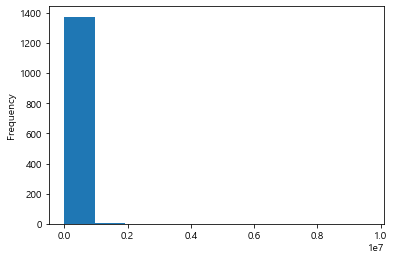

In [24]:
df['노출수'].plot(kind='hist')

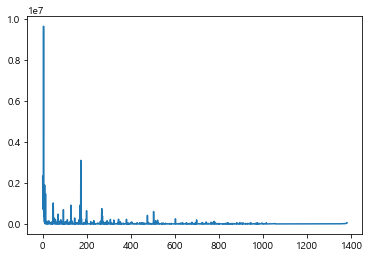

In [25]:
df['노출수'].plot()

In [26]:
imp_sort = df['노출수'].sort_values()
imp_sort

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [27]:
imp_sort.reset_index()

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [28]:
# 중점 관리할 키워드

In [29]:
imp = df['노출수']

In [30]:
imp.quantile(0.95) #상위 0.95의 노출수값

82858.0

In [31]:
imp.quantile(0.05) #상위 0.95의 노출수값

1122.0

In [32]:
imp.median() # 중앙값

3805.0

In [33]:
imp.mean()

35054.14844315713

In [34]:
# 노출수 상위 95% 키워드

In [36]:
imp[imp > imp.quantile(0.95)]

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
602     247898
698     196862
741      94933
777     126393
780      90041
Name: 노출수, Length: 69, dtype: int64

In [38]:
df_index = df.set_index('키워드')

In [39]:
imp = df_index['노출수']

In [42]:
imp[imp > imp.quantile(0.95)]

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
유행어        247898
부동산스터디     196862
가상메모리       94933
앱스토어       126393
OS          90041
Name: 노출수, Length: 69, dtype: int64

In [43]:
imp[imp > imp.quantile(0.95)].index

Index(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       '블록체인', '엑셀', '영상편집', '-', '포토샵', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급',
       '포토샵', '리눅스', '-', '프리미어프로', '스프링', '폰트', '마케팅', '스케치', '일러스트', '포토샵',
       '홍보영상', '인디자인', '마케팅', '영상촬영', 'HTML', '데이터베이스', '글씨체', 'R', '프리미어',
       '한글폰트', '마블', '바이럴마케팅', '경영', '컴공', '창고매매', '프리미어프로', '일러스트레이터',
       '일러스트레이터', '프리미어', '논문', '엑셀함수', '광고', '엑셀', '스케치', '운영체제', 'UI',
       'SNS마케팅', '소프트웨어', '유닉스', '우분투', '유튜브채널', 'SNS마케팅', 'IOS', '안드로이드',
       '펀드', '엑셀', '유행어', '부동산스터디', '가상메모리', '앱스토어', 'OS'],
      dtype='object', name='키워드')

In [44]:
# 중점관리 키워드
# 노출수 상위 80%이면서, 클릭수가 상위 80%인 키워드를 추출

In [56]:
clk = df_index['클릭률']
clk

키워드
-           0.004141
-           0.010499
일러스트        0.000285
-           0.002685
HTML        0.000085
              ...   
엑셀셀서식       0.000000
MATCH       0.000000
LTV         0.000000
DECISION    0.000000
REST        0.000000
Name: 클릭률, Length: 1381, dtype: float64

In [53]:
clk[clk>clk.quantile(0.95)]

키워드
가상화폐         0.031061
인스타팔로워늘리기    0.024132
엑셀배우기        0.112847
엑셀자격증        0.047127
파이썬교육        0.046003
               ...   
포토샵기초        0.032380
주식투자하는법      0.039357
주식사는법        0.029376
그로스해커        0.017207
연금펀드         0.025159
Name: 클릭률, Length: 69, dtype: float64

In [54]:
df_index[(imp > imp.quantile(0.95)) & (clk>clk.quantile(0.95))].index

Index(['가상화폐', '포토샵'], dtype='object', name='키워드')

In [55]:
# 저효율 키워드 선별
# 1. 노출수 상위 95% 미만
# 2. 클릭수 상위 95% 미만
# 3. 총비용 상위 85% 이상

In [62]:
cond1 = df_index['노출수'] < df_index['노출수'].quantile(0.70)
cond2 = df_index['클릭수'] < df_index['클릭수'].quantile(0.70)
cond3 = df_index['총비용(VAT포함,원)'] >= df_index['총비용(VAT포함,원)'].quantile(0.7)

df_index[cond1 & cond2 & cond3].index

Index(['브랜드마케팅', '데이터분석', '파이썬프로그래밍', 'C언어기초', '유튜브영상제작', '모바일게임개발', '쇼핑몰창업',
       '게임만들기', '데이터분석', '프로그래밍독학', '게임제작', '게임UI', 'TENSORFLOW', '쇼핑몰통합관리',
       '데이터분석', '파이썬자격증', '오픈마켓창업', '투자분석', '코딩배우기', '코딩기초', '어플만드는법', '쇼핑몰구축',
       '유튜브영상제작', '네이티브광고', '바이럴영상', 'CRM', '페이스북광고', '영상편집교육', '브랜드마케팅',
       '웹서버', '데이터수집', 'EDA', '동영상편집', '검색광고', '마케팅분석', 'UX디자인', '카드뉴스제작',
       'DEEPLEARNING', '콘텐츠기획', '노무관리', '딥러닝', '인플루언서마케팅'],
      dtype='object', name='키워드')